In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from scipy.spatial import ConvexHull

data = datasets.load_iris() 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target) 



In [29]:
def minmax(points, key = lambda x: x[0]):
    mn = np.finfo(np.float64).max
    mx = np.finfo(np.float64).min
    for i in range(len(points)):
        if(mn > key(points[i])):
            mn = key(points[i])
            idmn = i
        if(mx < key(points[i])):
            mx = key(points[i])
            idmx = i
    return idmn, idmx

print(minmax([[1,2],[10,2],[-1,10],[11,11]]))

(2, 3)


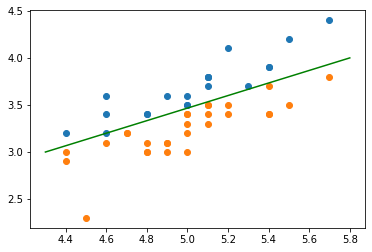

In [30]:
def classifyRegion(point, p1, p2):
    x1, y1 = p1
    x2, y2 = p2
    xt, yt = point
    # buat persamaan garis ay = bx + c
    a = x2-x1
    b = y2-y1
    c = (x2-x1)*y1 - (y2-y1)*x1
    # 1 is above
    # 0 is in the line
    # -1 is below
    if(a*yt > b*xt + c):
        return 1
    elif(np.abs(a*yt-b*xt-c)<1e-9):
        return 0
    else:
        return -1

points = df[df['Target'] == 0]
points = points.iloc[:,[0,1]].values
mn, mx = minmax(points)
s1 = np.array([point for point in points if classifyRegion(point, points[mn], points[mx])==1])
s2 = np.array([point for point in points if classifyRegion(point, points[mn], points[mx])==-1])
plt.scatter(s1[:, 0], s1[:, 1])
plt.scatter(s2[:, 0], s2[:, 1])
plt.plot(points[[mn, mx], 0], points[[mn, mx], 1], "g")


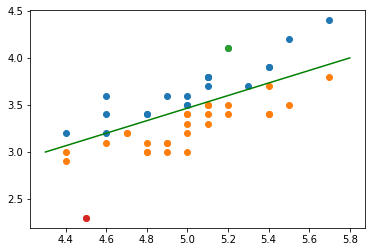

In [33]:
def getExtremeNode(points, p1, p2):
    def getDist(point):
        x1, y1 = p1
        x2, y2 = p2
        xt, yt = point
        # buat persamaan garis ay = bx + c
        a = x2-x1
        b = y2-y1
        c = (x2-x1)*y1 - (y2-y1)*x1
        denum = np.hypot(a, b)
        num = np.abs(a*yt - b*xt - c)
        return num/denum
    _, mx = minmax(points, getDist)
    return points[mx]

p1 = getExtremeNode(s1, points[mn], points[mx])
p2 = getExtremeNode(s2, points[mn], points[mx])

plt.scatter(s1[:, 0], s1[:, 1])
plt.scatter(s2[:, 0], s2[:, 1])
plt.scatter(p1[0], p1[1])
plt.scatter(p2[0], p2[1])
plt.plot(points[[mn, mx], 0], points[[mn, mx], 1], "g")

In [ ]:
def MyConvexHull(points):
    



SyntaxError: unexpected EOF while parsing (Temp/ipykernel_22288/1330667250.py, line 3)

[[13, 47], [47, 14], [14, 41], [41, 13]]
[[7, 47], [47, 0], [0, 18], [18, 7]]
[[6, 10], [10, 31], [31, 18], [18, 6]]


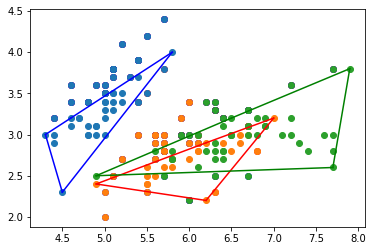

In [ ]:
# plt.figure(figsize = (10, 6))
colors = ['b','r','g']
# plt.title('Petal Width vs Petal Length')
# plt.xlabel(data.feature_names[0])
# plt.ylabel(data.feature_names[1])
for i in range(3):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = MyConvexHull(np.array(bucket))
    print(hull)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])

In [ ]:
df = open("./tes.csv", "r")
print(type(df.read()))

<class 'str'>


In [ ]:
Points = [[1.3,2],[2,3]]
Points = [Points[j]+[j] for j in range(len(Points))]
Points

[[1.3, 2, 0], [2, 3, 1]]